# Analysis of the Iris Data Set
***

In [26]:
# Load the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the data set
iris = pd.read_csv("iris.data", header = None)

## Explore the Data Set

In [28]:
# Overview of the data set
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Add column names

Problem! The quick overview of the data set reveals that there are no column names in the imported csv file.

The column names were obtained from the variables table on the [information page of the iris data set](https://archive.ics.uci.edu/dataset/53/iris). They are sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm and species.

Initally Problem loosing 1 row of data doing it this way. it is converting the data in row 0 to the column names direcly. need to add the column names above the row. Fixed the problem using the argument [header = None](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html) when reading in the csv file. 

In [29]:
# Add column names
iris.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']  
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## The Variables in the Data Set

In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

In [32]:
# Summary statistics of the data set
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
iris.groupby('species').describe()

sepal_length_cm                                              \
                          count   mean       std  min    25%  50%  75%  max   
species                                                                       
Iris-setosa                50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor            50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica             50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width_cm         ... petal_length_cm       \
                         count   mean  ...             75%  max   
species                                ...                        
Iris-setosa               50.0  3.418  ...           1.575  1.9   
Iris-versicolor           50.0  2.770  ...           4.600  5.1   
Iris-virginica            50.0  2.974  ...           5.875  6.9   

                petal_width_cm                                            
                         count   mean       std  min  25%  50%  75%  max  
species                                                                   
Iris-setosa               50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor           50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica            50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [34]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
setosa = iris[iris['species'] == 'Iris-setosa']
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


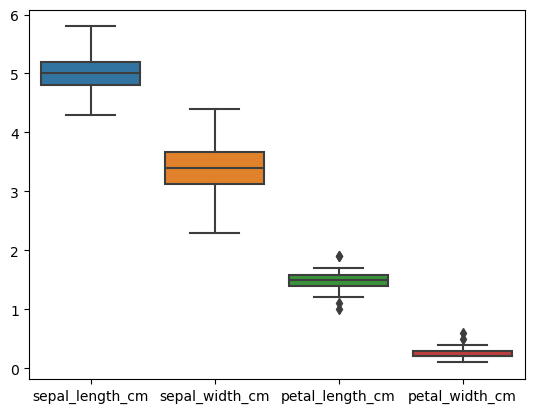

In [36]:
#Box plot of above, add titles

sns.boxplot(setosa)
plt.show()

In [37]:
versicolor = iris[iris['species'] == 'Iris-versicolor']
versicolor.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


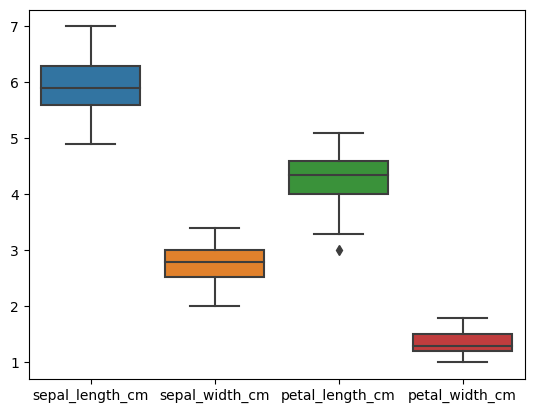

In [38]:
sns.boxplot(versicolor)
plt.show()

In [39]:
virginica = iris[iris['species'] == 'Iris-virginica']
virginica.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


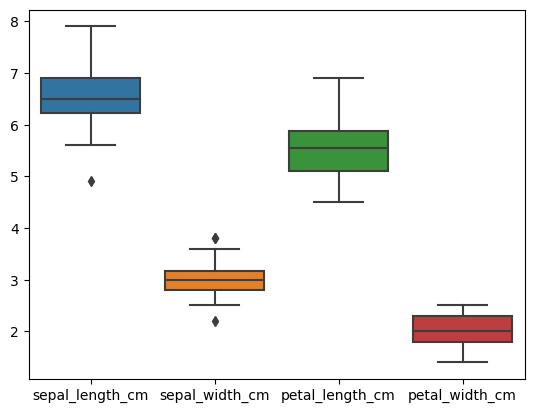

In [40]:
sns.boxplot(virginica)
plt.show()

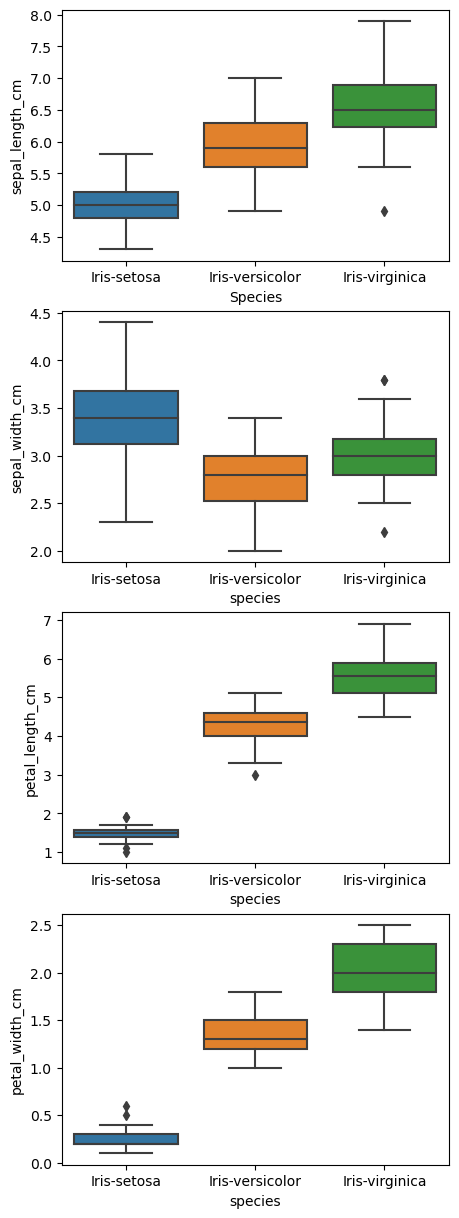

In [41]:
## Trying to compare across the three species. Looks squashed. 

fig, axes = plt.subplots(4, figsize = (5, 15))
sns.boxplot(ax = axes[0], x = 'species', y = 'sepal_length_cm', data = iris)
axes[0].set_xlabel('Species')
sns.boxplot(ax = axes[1], x = iris['species'], y= iris['sepal_width_cm'])
sns.boxplot(ax = axes[2], x = iris['species'], y = iris['petal_length_cm'])
sns.boxplot(ax = axes[3], x = iris['species'], y = iris['petal_width_cm'])

plt.show()

## Histogram of each variable

A histogram of each variable must be saved to a png file.

TO DO
overall hist
breakdown by species. 

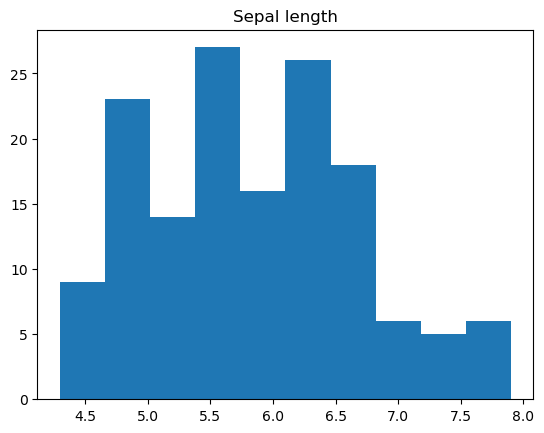

In [42]:
plt.hist(iris['sepal_length_cm'])
plt.title('Sepal length')
plt.show()

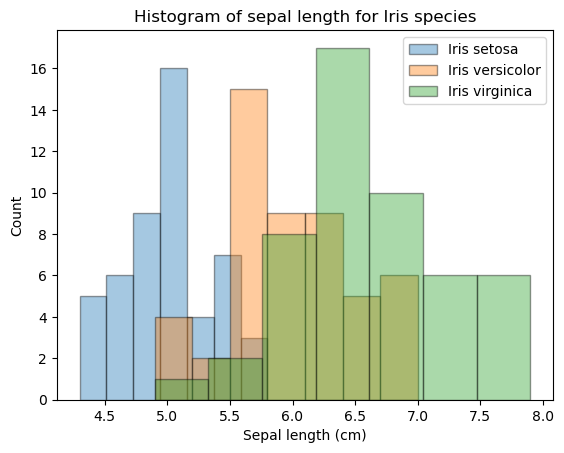

In [43]:
# Histogram of Sepal Length by species. 
fig, ax = plt.subplots()
ax.hist(setosa['sepal_length_cm'], label = 'Iris setosa', edgecolor = 'black', alpha = 0.4, bins = 7)
ax.hist(versicolor['sepal_length_cm'], label = 'Iris versicolor', edgecolor = 'black', alpha = 0.4, bins = 7)
ax.hist(virginica['sepal_length_cm'], label = 'Iris virginica', edgecolor = 'black', alpha = 0.4, bins = 7)
ax.set_title('Histogram of sepal length for Iris species')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Count')
ax.legend()
plt.savefig('sepal_length_overlap.png')
plt.show()

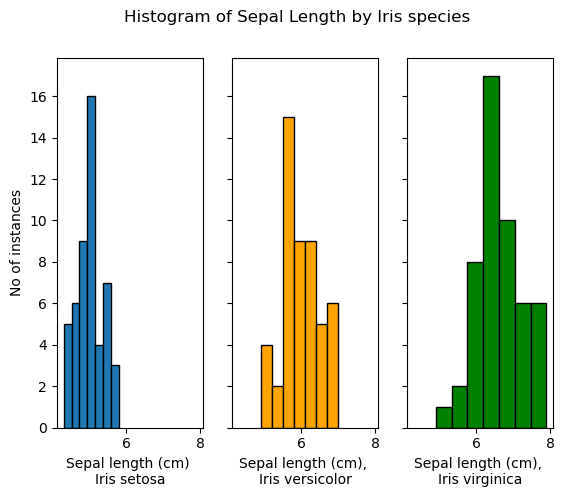

In [44]:
# Histogram of Sepal Length by species. 
fig, ax = plt.subplots(1, 3, sharex= True, sharey= True)
ax[0].hist(setosa['sepal_length_cm'], edgecolor = 'black', alpha = 1.0, bins = 7)
ax[1].hist(versicolor['sepal_length_cm'], label = 'Iris versicolor', color = 'orange', edgecolor = 'black', alpha = 1.0, bins = 7)
ax[2].hist(virginica['sepal_length_cm'], label = 'Iris virginica', color = 'green', edgecolor = 'black', alpha = 1.0, bins = 7)

ax[0].set_xlabel('Sepal length (cm) \nIris setosa')
ax[1].set_xlabel('Sepal length (cm), \nIris versicolor')
ax[2].set_xlabel('Sepal length (cm), \nIris virginica')
ax[0].set_ylabel('No of instances')

fig.suptitle('Histogram of Sepal Length by Iris species')

#plt.savefig('sepal_length.png')
plt.show()

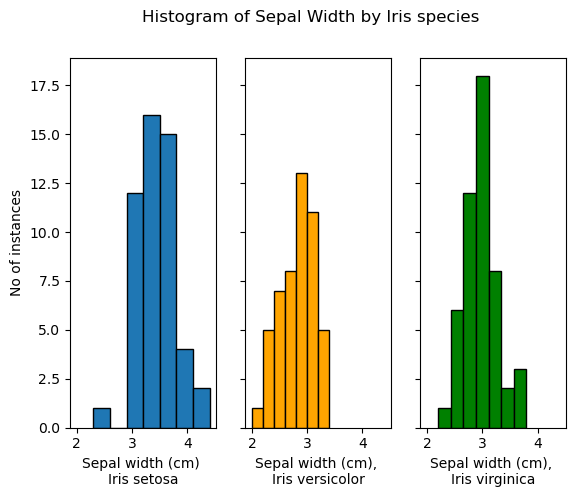

In [45]:
# Histogram of Sepal Width
fig, ax = plt.subplots(1, 3, sharex= True, sharey= True)
ax[0].hist(setosa['sepal_width_cm'], edgecolor = 'black', alpha = 1.0, bins = 7)
ax[1].hist(versicolor['sepal_width_cm'], label = 'Iris versicolor', color = 'orange', edgecolor = 'black', alpha = 1.0, bins = 7)
ax[2].hist(virginica['sepal_width_cm'], label = 'Iris virginica', color = 'green', edgecolor = 'black', alpha = 1.0, bins = 7)

ax[0].set_xlabel('Sepal width (cm) \nIris setosa')
ax[1].set_xlabel('Sepal width (cm), \nIris versicolor')
ax[2].set_xlabel('Sepal width (cm), \nIris virginica')
ax[0].set_ylabel('No of instances')

fig.suptitle('Histogram of Sepal Width by Iris species')

#plt.savefig('sepal_width.png')
plt.show()


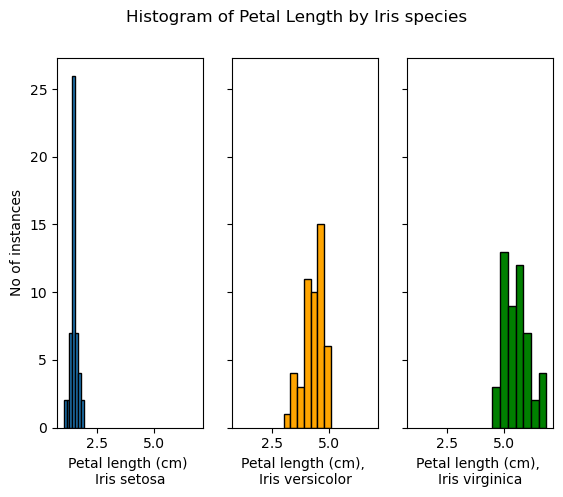

In [46]:
# Histogram of Petal Length
fig, ax = plt.subplots(1, 3, sharex= True, sharey= True)
ax[0].hist(setosa['petal_length_cm'], edgecolor = 'black', alpha = 1.0, bins = 7)
ax[1].hist(versicolor['petal_length_cm'], label = 'Iris versicolor', color = 'orange', edgecolor = 'black', alpha = 1.0, bins = 7)
ax[2].hist(virginica['petal_length_cm'], label = 'Iris virginica', color = 'green', edgecolor = 'black', alpha = 1.0, bins = 7)

ax[0].set_xlabel('Petal length (cm) \nIris setosa')
ax[1].set_xlabel('Petal length (cm), \nIris versicolor')
ax[2].set_xlabel('Petal length (cm), \nIris virginica')
ax[0].set_ylabel('No of instances')

fig.suptitle('Histogram of Petal Length by Iris species')

#plt.savefig('petal_length.png')
plt.show()

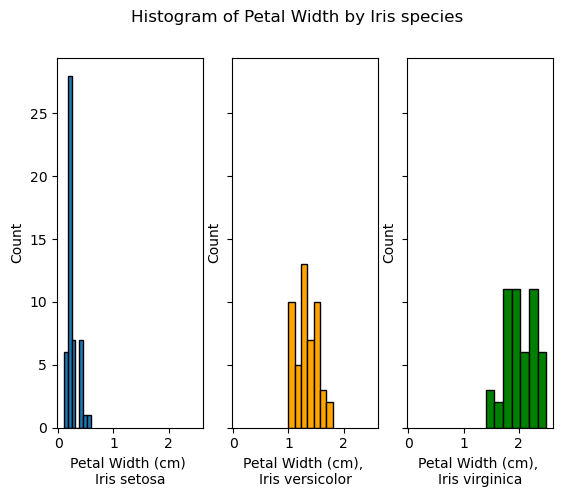

In [47]:
# Histogram of Petal Width
fig, ax = plt.subplots(1, 3, sharex= True, sharey= True)
ax[0].hist(setosa['petal_width_cm'], edgecolor = 'black', alpha = 1.0, bins = 7)
ax[1].hist(versicolor['petal_width_cm'], label = 'Iris versicolor', color = 'orange', edgecolor = 'black', alpha = 1.0, bins = 7)
ax[2].hist(virginica['petal_width_cm'], label = 'Iris virginica', color = 'green', edgecolor = 'black', alpha = 1.0, bins = 7)

ax[0].set_xlabel('Petal Width (cm) \nIris setosa')
ax[1].set_xlabel('Petal Width (cm), \nIris versicolor')
ax[2].set_xlabel('Petal Width (cm), \nIris virginica')

ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')

fig.suptitle('Histogram of Petal Width by Iris species')

#plt.savefig('petal_width.png')
plt.show()

## Scatter plot of each pair of variables. 

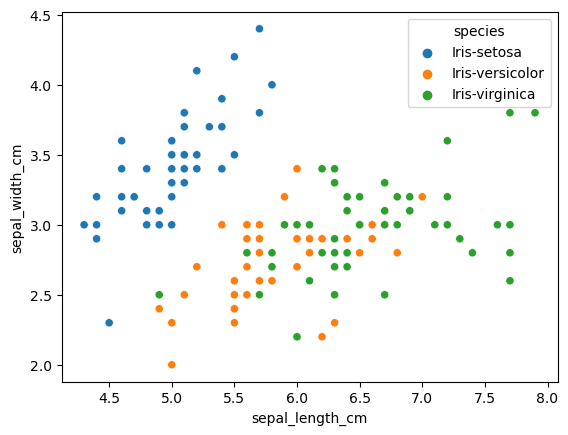

In [49]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'sepal_width_cm', hue = 'species')
plt.show()

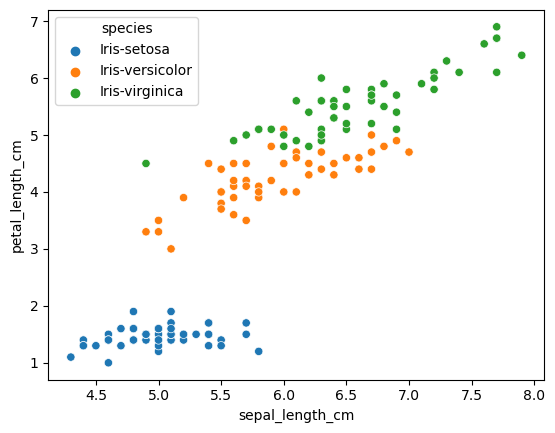

In [50]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_length_cm', hue = 'species')
plt.show()

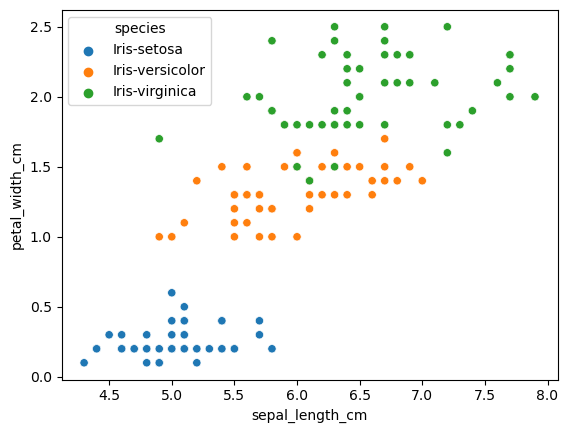

In [51]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

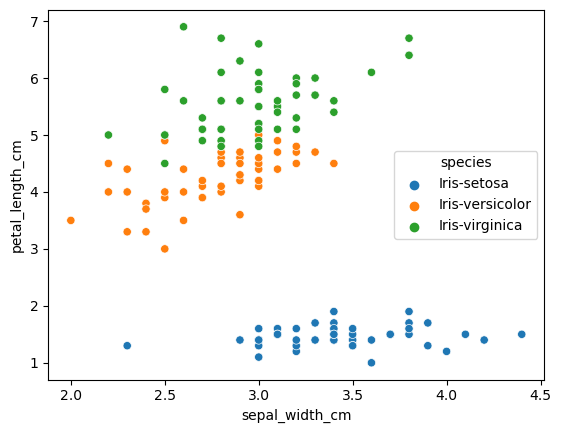

In [52]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_length_cm', hue = 'species')
plt.show()

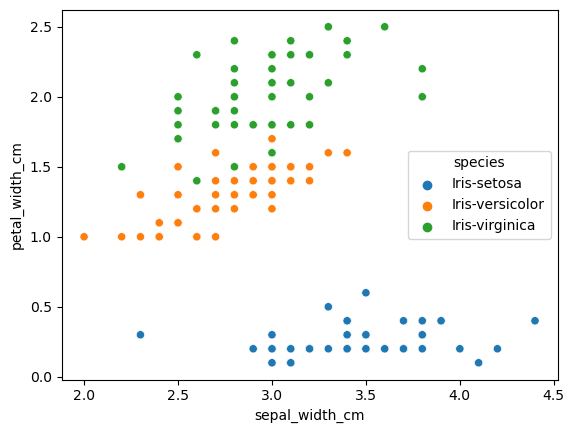

In [53]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

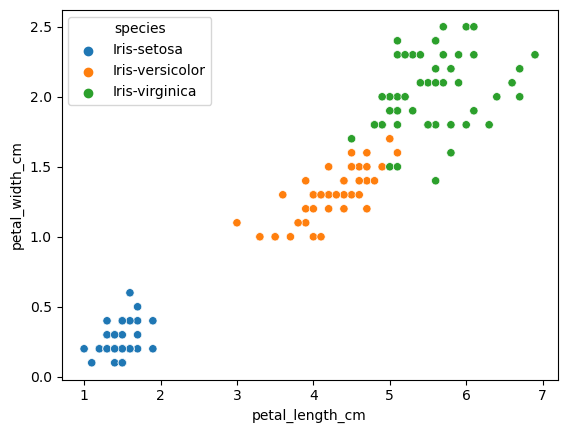

In [54]:
sns.scatterplot(data = iris, x = 'petal_length_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

Pairplots

https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


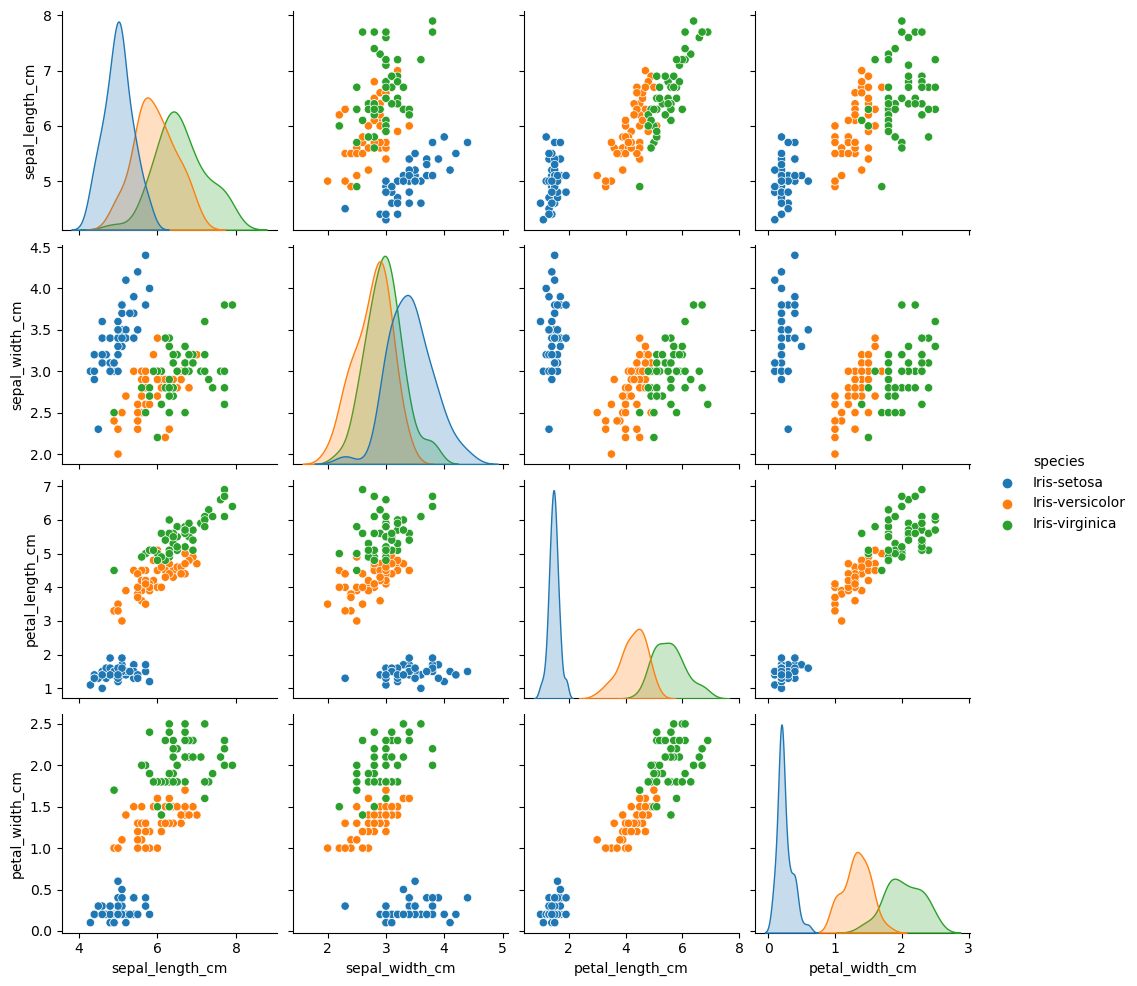

In [56]:
sns.pairplot(iris, hue = 'species')
plt.show()

Any other analysis , heatmaps

In [62]:
iris.drop(['species'], axis = 1).corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


heatmap by flower species

<Axes: >

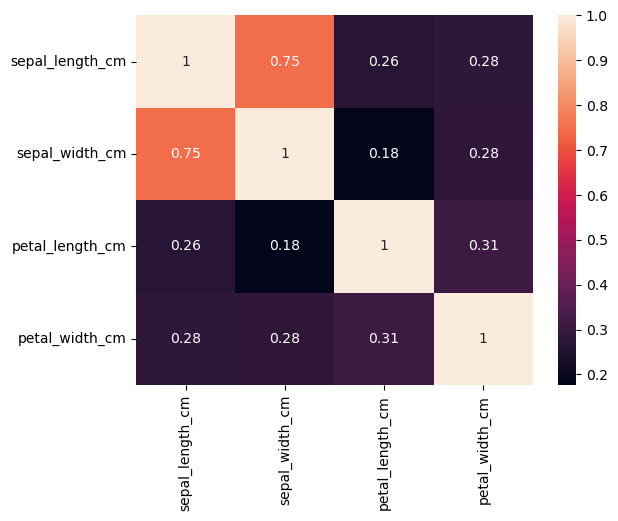

In [63]:
sns.heatmap(setosa.drop(['species'], axis = 1).corr(), annot = True)

<Axes: >

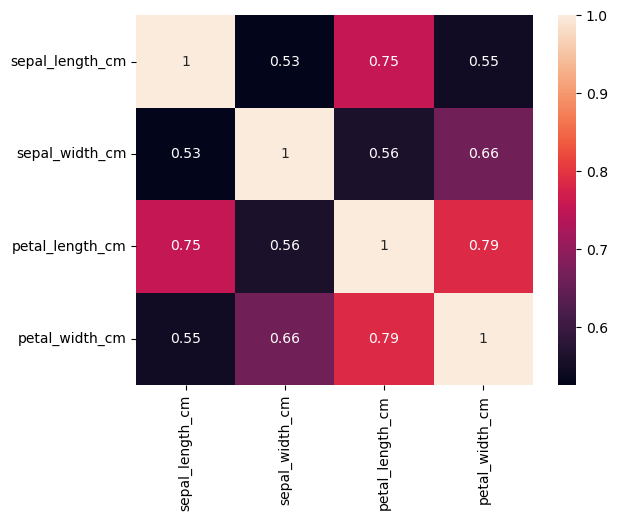

In [64]:
sns.heatmap(versicolor.drop(['species'], axis = 1).corr(), annot = True)

<Axes: >

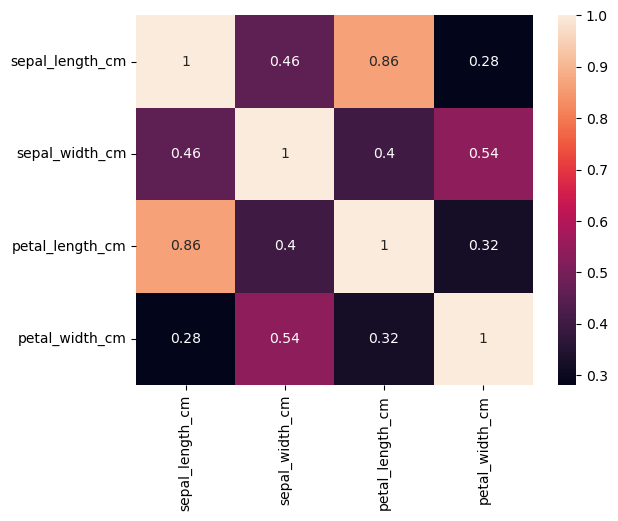

In [65]:
sns.heatmap(virginica.drop(['species'], axis = 1).corr(), annot = True)

## References

https://www.geeksforgeeks.org/ways-to-save-python-terminal-output-to-a-text-file/

[Iris Data Set](https://archive.ics.uci.edu/dataset/53/iris)


*** 
## END